<a href="https://colab.research.google.com/github/srikanthravipati27/ml/blob/main/ML3_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/drive/MyDrive/titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
print(data.isnull().sum())
print(data.isnull().mean()*100)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


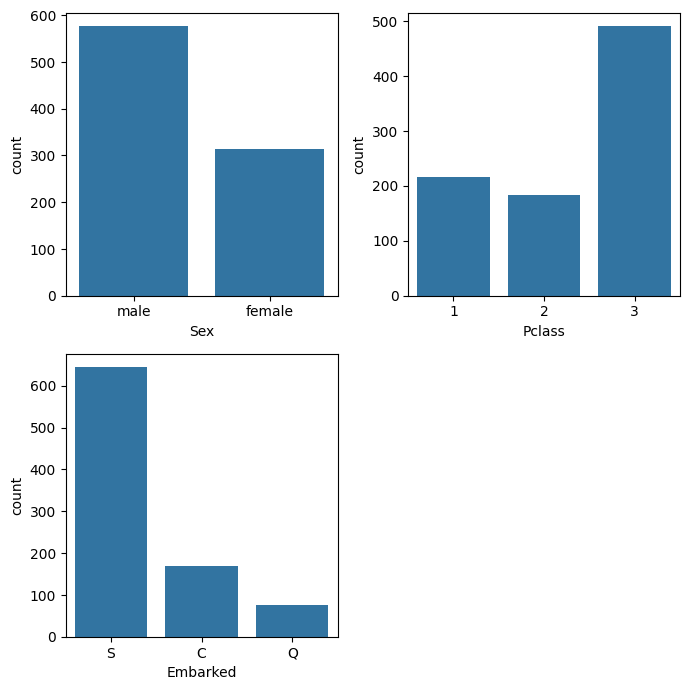

In [ ]:
cat=['Sex','Pclass','Embarked']
plt.figure(figsize=(7,7))
for i in range(len(cat)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=cat[i],data=data)
  plt.tight_layout()
plt.show()

<Axes: xlabel='Fare', ylabel='Count'>

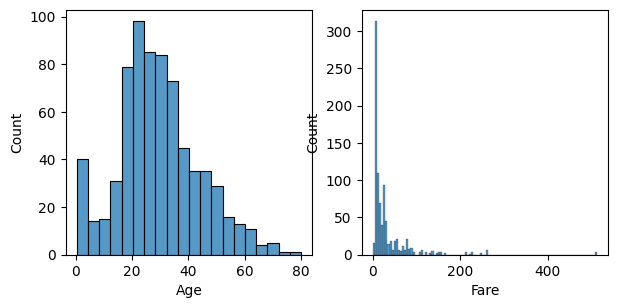

In [ ]:
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
sns.histplot(data['Age'])
plt.subplot(2,2,2)
sns.histplot(data['Fare'])


In [ ]:
data=data.drop('Cabin',axis=1)
data=data.drop('PassengerId',axis=1)
data=data.drop('Name',axis=1)
data=data.drop('Ticket',axis=1)
data['Age']=data['Age'].fillna(data['Age'].mean())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [ ]:
num=data.select_dtypes(include=[int,float])
num.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: xlabel='Fare', ylabel='Count'>

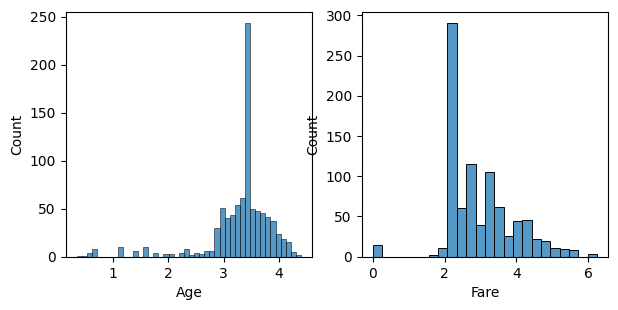

In [ ]:
data['Age']=np.log1p(data['Age'])
data['Fare']=np.log1p(data['Fare'])
plt.figure(figsize=(7,7))
plt.subplot(2,2,1)
sns.histplot(data['Age'])
plt.subplot(2,2,2)
sns.histplot(data['Fare'])


In [ ]:
data['Family size']=data['SibSp']+data['Parch']+1
data['Alone']=(data['Family size']==1).astype(int)
# data=data.drop(['SibSp','Parch'],axis=1)


In [ ]:
data[['Family size','Alone','Survived']].corr()

,Family size,Alone,Survived
Family size,1.000000,-0.690922,0.016639
Alone,-0.690922,1.000000,-0.203367
Survived,0.016639,-0.203367,1.000000


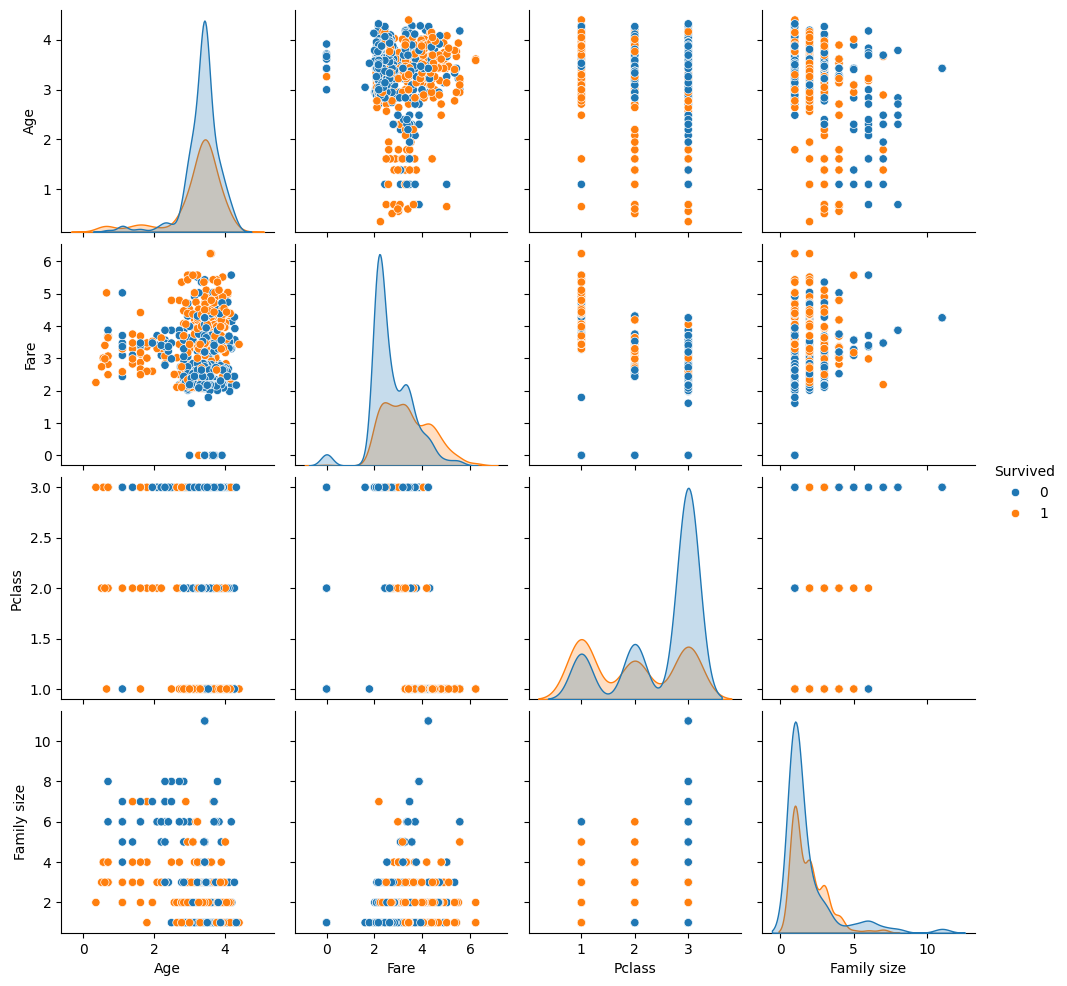

In [ ]:
sns.pairplot(data[['Survived', 'Age', 'Fare', 'Pclass', 'Family size']], hue='Survived')
plt.show()

<Axes: >

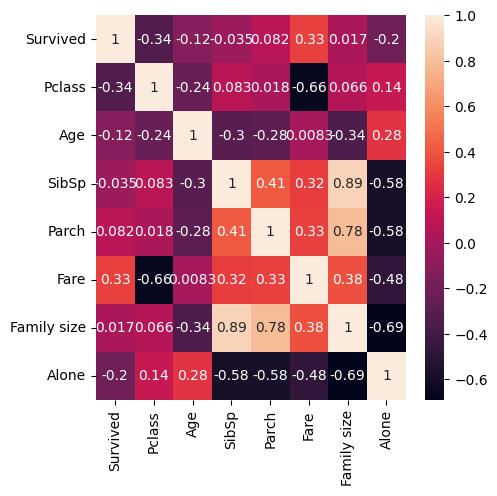

In [ ]:
nums=data.select_dtypes(include=[int,float])
plt.figure(figsize=(5,5))
sns.heatmap(nums.corr(),annot=True)

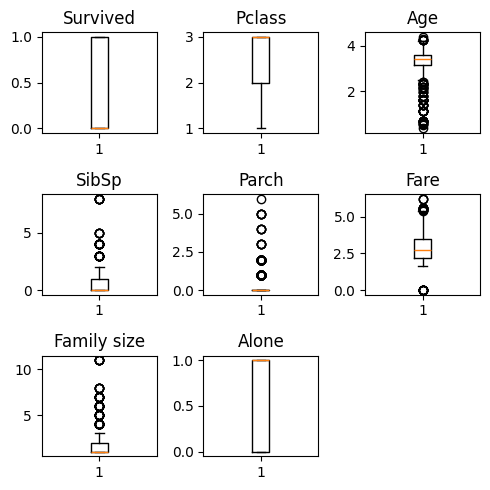

In [ ]:
plt.figure(figsize=(5,5))
k=nums.columns.tolist()
for i in range(len(k)):
  plt.subplot(3,3,i+1)
  plt.boxplot(data[k[i]])
  plt.title(k[i])
  plt.tight_layout()
plt.show()

In [ ]:
def outliers(data,column):
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  iqr=q3-q1
  l=q1-1.5*iqr
  u=q3+1.5*iqr
  print(l,u)
  data[column]=np.where(data[column]>u,u,np.where(data[column]<l,l,data[column]))

outliers(data,'Age')
outliers(data,'Fare')
outliers(data,'Family size')


2.4634571321387093 4.25555602224655
0.26944062443393046 5.383513069819204
-0.5 3.5


In [ ]:

data['Sex']=data['Sex'].map({'male':0,'female':1})
data
data=pd.get_dummies(data,columns=['Embarked']).astype(int)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family size,Alone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,3,1,0,2,2,0,0,0,1
1,1,1,1,3,1,0,4,2,0,1,0,0
2,1,3,1,3,0,0,2,1,1,0,0,1
3,1,1,1,3,1,0,3,2,0,0,0,1
4,0,3,0,3,0,0,2,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,2,1,1,0,0,1
887,1,1,1,2,0,0,3,1,1,0,0,1
888,0,3,1,3,1,2,3,3,0,0,0,1
889,1,1,0,3,0,0,3,1,1,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x=data.drop('Survived',axis=1)
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
print("accuracy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))

accuracy 0.7932960893854749
precision 0.7846153846153846
confusion matrix [[91 14]
 [23 51]]
